In [90]:
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np

# Califa times

In [91]:
filename_califa="realData/califa/ITS_0046_timestamps.csv"
clock_califa=60E6
df_califa = pd.read_csv(filename_califa, skiprows = lambda x: x > 499282 or 0 < x < 813)
df_califa["EventNr"] = df_califa.index
df_califa["time"] = (df_califa["Timestamp1"]-df_califa["Timestamp1"][0])/clock_califa
df_califa["isMatched"] = [False for i in range(len(df_califa.index))]
df_califa.head()

,EventNr,nHits,ID1,Timestamp1,Time1,ID2,Timestamp2,Time2,ID3,Timestamp3,Time3,ID4,Timestamp4,Time4,ID5,Timestamp5,Time5,time,isMatched
0,0,3,1487,5301452991753,1741.0,5.301453e+12,1866.0,5.301453e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,False
1,1,1,1487,5301453270940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004653,False
2,2,2,1486,5301453289046,1741.0,5.301453e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,False
3,3,2,1486,5301453378592,1741.0,5.301453e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006447,False
4,4,1,1487,5301453398843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006785,False


# uITS3 times

In [92]:
filename_its="realData/uits/timestamps_run447065242.csv"
clock_its=80E6
df_its = pd.read_csv(filename_its)
df_its["time"] = (df_its["ALPIDE_plane_0"]-df_its["ALPIDE_plane_0"][0])/clock_its
#df_its["time_corrected"] = df_its["time"]*(df_califa["time"][round(4E5/0.96)]/df_its["time"][4E5])
df_its["isMatched"] = [False for i in range(len(df_its.index))]
df_its.head()

,EventNr,TriggerNr,ALPIDE_plane_2,ALPIDE_plane_1,ALPIDE_plane_3,ALPIDE_plane_4,ALPIDE_plane_0,time,isMatched
0,7,0,10398104755677,10398093355285,10397825762158,10398031010463,10398020531068,0.000000,False
1,8,1,10398105127933,10398093727541,10397826134412,10398031382717,10398020903321,0.004653,False
2,9,2,10398105152080,10398093751688,10397826158559,10398031406864,10398020927468,0.004955,False
3,10,3,10398105271446,10398093871054,10397826277924,10398031526229,10398021046833,0.006447,False
4,11,4,10398105298443,10398093898050,10397826304920,10398031553225,10398021073829,0.006785,False


# Comparison

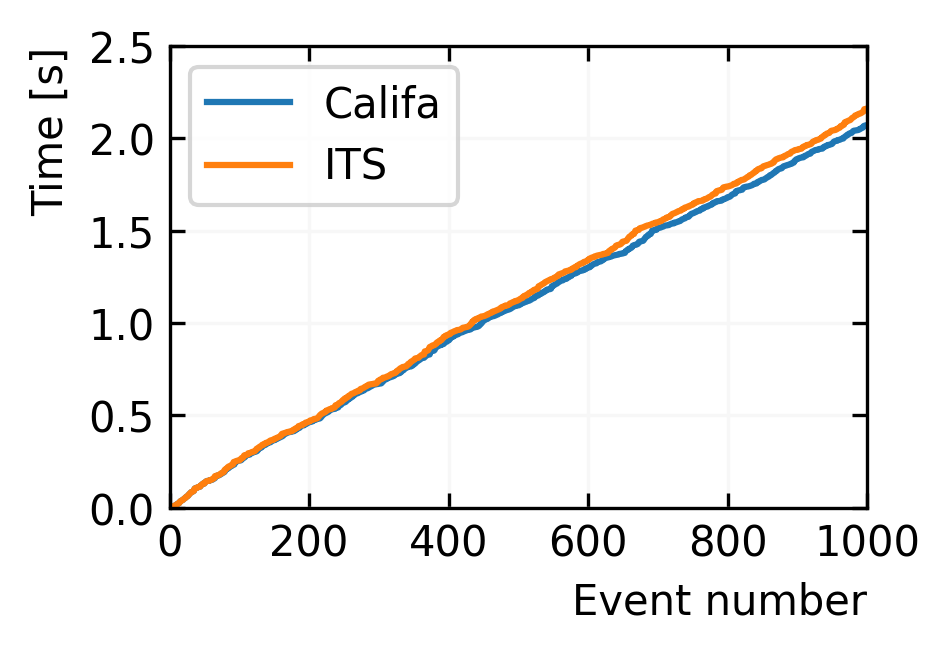

In [93]:
plt.figure(figsize=(3,2),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.ylim([0,2.5])
plt.xlim([0,1000])

df_califa.plot(y="time",x="EventNr",ax=ax,label="Califa")
df_its.plot(y="time",x="TriggerNr",ax=ax,label="ITS")
    
ax.set_ylabel("Time [s]",horizontalalignment="right",y=1.0)
ax.set_xlabel("Event number",horizontalalignment="right",x=1.0)

plt.grid(visible=True,which="both",axis='both', color='0.97')
#plt.savefig(runname+"_timestamps_vs_time.png")

In [95]:
#limit = len(df_its.index)
limit = 30000
isFound = [False for i in range(limit)] 
event = 1
prev=0
isFound[0] = True
counter = 0
timeStep = 0
df_its["trigger_corrected"] = df_its["TriggerNr"]
time_shift = 0
timeStep = 0
for trigger in range(1,limit):
    timeStep = df_califa["time"][trigger] - df_califa["time"][prev]
    eventTimeStep = df_its["time"][event] - df_its["time"][event-1]
    extraEvent = 0
    while eventTimeStep < timeStep/1.4:
        extraEvent+=1
        if(extraEvent > 10) : sys.exit('ERROR: Found too many consecutive extra events, something probably went wrong!')
        print("ExtraEvent #"+str(extraEvent)+" / Califa trig:"+ str(trigger)+" -timestep:"+str(timeStep)+" / ALPIDE event:"+str(event)+ " -timestep: "+str(eventTimeStep))        
        event+=1
        eventTimeStep = df_its["time"][event] - df_its["time"][event-1-extraEvent]
    if timeStep < 99E-6:
        counter+=1
        #print("Too short at "+str(trigger)+ " with " + str(timeStep))
    else:   
        if abs(eventTimeStep - timeStep) < timeStep*0.1:
            # To-Do: assign the time for hit from Califa 
            #time_shift += (df_its["time"][event]-df_califa["time"][trigger])
            #df_its.loc[df_its.index==event+1,"time_corrected"] += time_shift 
            #df_its.loc[df_its.index >= event, "time_corrected"] = df_its.loc[df_its.index >= event, "time_corrected"] + (df_califa["time"][trigger]-df_its["time_corrected"][event])
            df_its.loc[df_its.index==event,"trigger_corrected"] = trigger
            isFound[trigger] = True
            df_its.loc[df_its.index==event,"isMatched"] = True
            event += 1
            prev = trigger
        else:
            #prev = trigger
            counter+=1
            #print("Not found corresponding event in trigger "+str(trigger)+ " with timeStep "+str(timeStep))

print(counter)

ExtraEvent #1 / Califa trig:8138 -timestep:0.005581516666666175 / ALPIDE event:7774 -timestep: 0.0017543750000008629
ExtraEvent #1 / Califa trig:13136 -timestep:0.004088233333334301 / ALPIDE event:12554 -timestep: 0.00023149999999816373
ExtraEvent #1 / Califa trig:18358 -timestep:0.001652183333327173 / ALPIDE event:17564 -timestep: 0.00013666249999744196
ExtraEvent #1 / Califa trig:25883 -timestep:0.003878399999997839 / ALPIDE event:24784 -timestep: 0.001540124999998227
ExtraEvent #1 / Califa trig:29317 -timestep:0.002037066666666476 / ALPIDE event:28087 -timestep: 0.0014538625000000138
1258


In [101]:
df_califa_small = df_califa[0:limit].copy()
df_its_small = df_its.loc[df_its.isMatched == True].copy()
diffs_missed = []
#for i in range(len(df_califa_small.index)): 
for i in range(limit): 
    if isFound[i] == False:
        diffs_missed.append(df_califa_small["time"][i]-df_califa_small["time"][i-1])

In [102]:
time_corrected = df_califa["time"][df_its.loc[df_its.isMatched == True, "trigger_corrected"].to_numpy()].to_numpy()
trigger_corrected = df_its.loc[df_its.isMatched == True, "trigger_corrected"].to_numpy()
df_its["time_corrected"] = df_its["time"]
for i in range(len(time_corrected)):
    df_its.loc[df_its.index == i, "time_corrected"] = time_corrected[i]

KeyboardInterrupt: 

In [ ]:
len(time_corrected)

28741

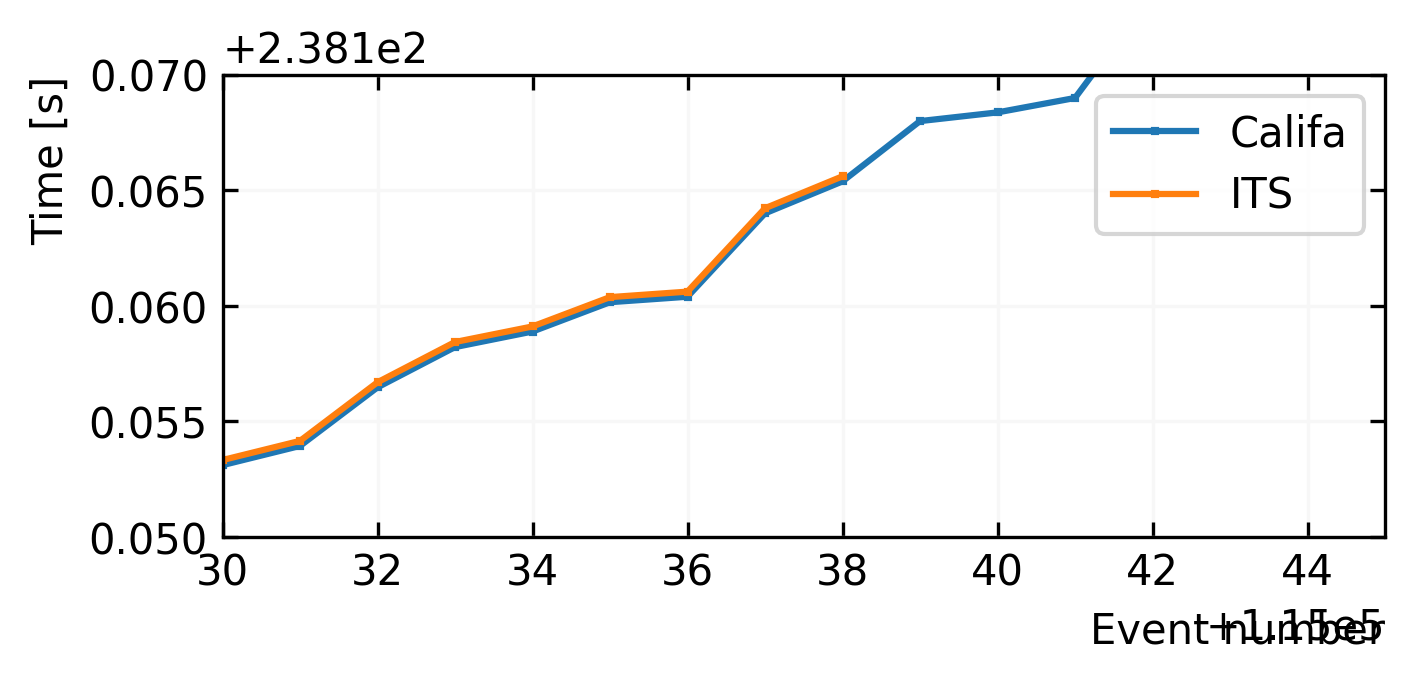

In [ ]:
plt.figure(figsize=(5,2),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.ylim([238.15,238.17])
plt.xlim([115030,115045])
df_its["time_corrected"] = df_its["time"] + 0.0035

df_califa.plot(y="time",x="EventNr",ax=ax,label="Califa",marker="s",markersize=1)
df_its[df_its.isMatched].plot(y="time_corrected",x="trigger_corrected",ax=ax,label="ITS",marker="s",markersize=1)
#df_califa_small[np.invert(isFound)].plot(y="time",x="EventNr",ax=ax,marker="x",linewidth=0,c="red",label="Missed")
    
ax.set_ylabel("Time [s]",horizontalalignment="right",y=1.0)
ax.set_xlabel("Event number",horizontalalignment="right",x=1.0)

plt.grid(visible=True,which="both",axis='both', color='0.97')
#plt.savefig(runname+"_timestamps_vs_time.png")
#16.9565540125

In [ ]:
df_califa["time"][50073:50090].diff()

50073         NaN
50074    0.008123
50075    0.004524
50076    0.004529
50077    0.000447
50078    0.002291
50079    0.003431
50080    0.004992
50081    0.001826
50082    0.000543
50083    0.002637
50084    0.000816
50085    0.000499
50086    0.002418
50087    0.005716
50088    0.004461
50089    0.000064
Name: time, dtype: float64

In [ ]:
df_its["time"][47960:47975].diff()

47960         NaN
47961    0.008122
47962    0.004525
47963    0.004124
47964    0.000405
47965    0.000447
47966    0.002291
47967    0.003431
47968    0.004992
47969    0.001826
47970    0.000543
47971    0.002636
47972    0.000817
47973    0.000498
47974    0.002418
Name: time, dtype: float64

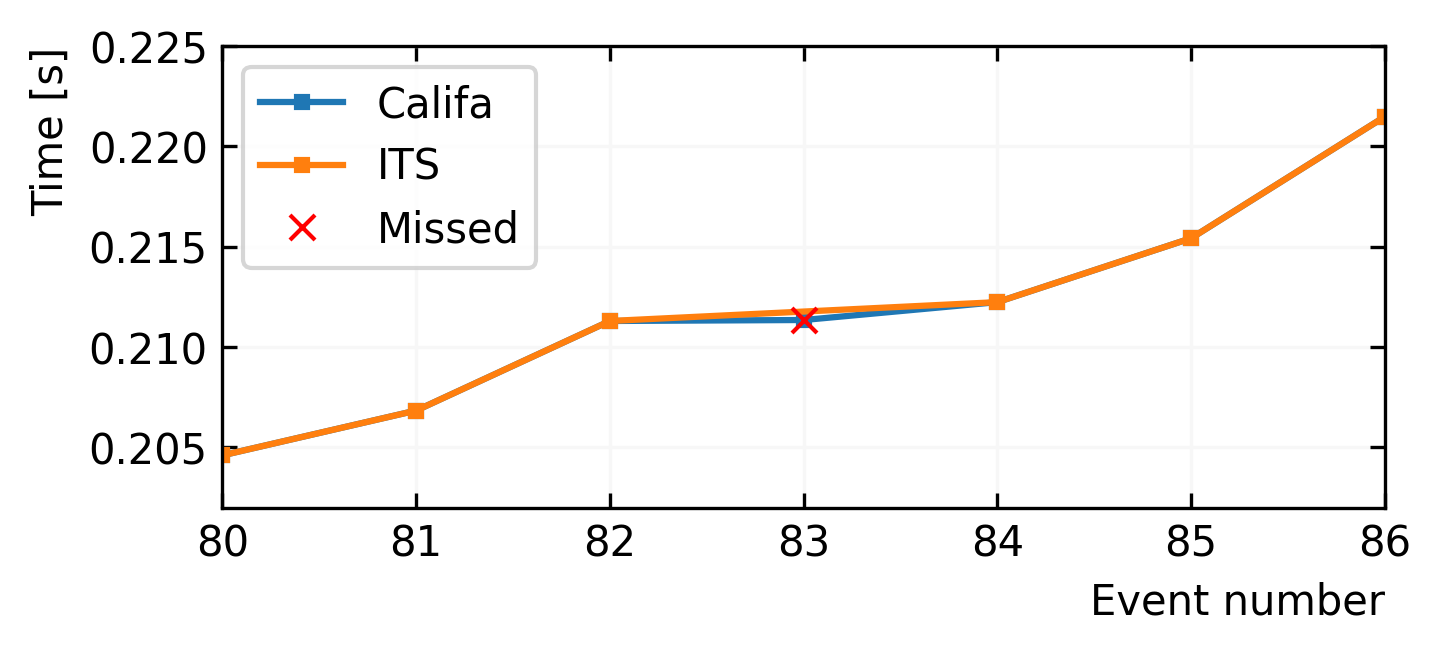

In [ ]:
plt.figure(figsize=(5,2),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.ylim([0.202,0.225])
plt.xlim([80,86])

df_califa.plot(y="time",x="EventNr",ax=ax,label="Califa",marker="s",markersize=3)
df_its.plot(y="time_corrected",x="trigger_corrected",ax=ax,label="ITS",marker="s",markersize=3)
df_califa_small[np.invert(isFound)].plot(y="time",x="EventNr",ax=ax,marker="x",linewidth=0,c="red",label="Missed")
    
ax.set_ylabel("Time [s]",horizontalalignment="right",y=1.0)
ax.set_xlabel("Event number",horizontalalignment="right",x=1.0)

plt.grid(visible=True,which="both",axis='both', color='0.97')
#plt.savefig(runname+"_timestamps_vs_time.png")

KeyError: 'time_corrected'

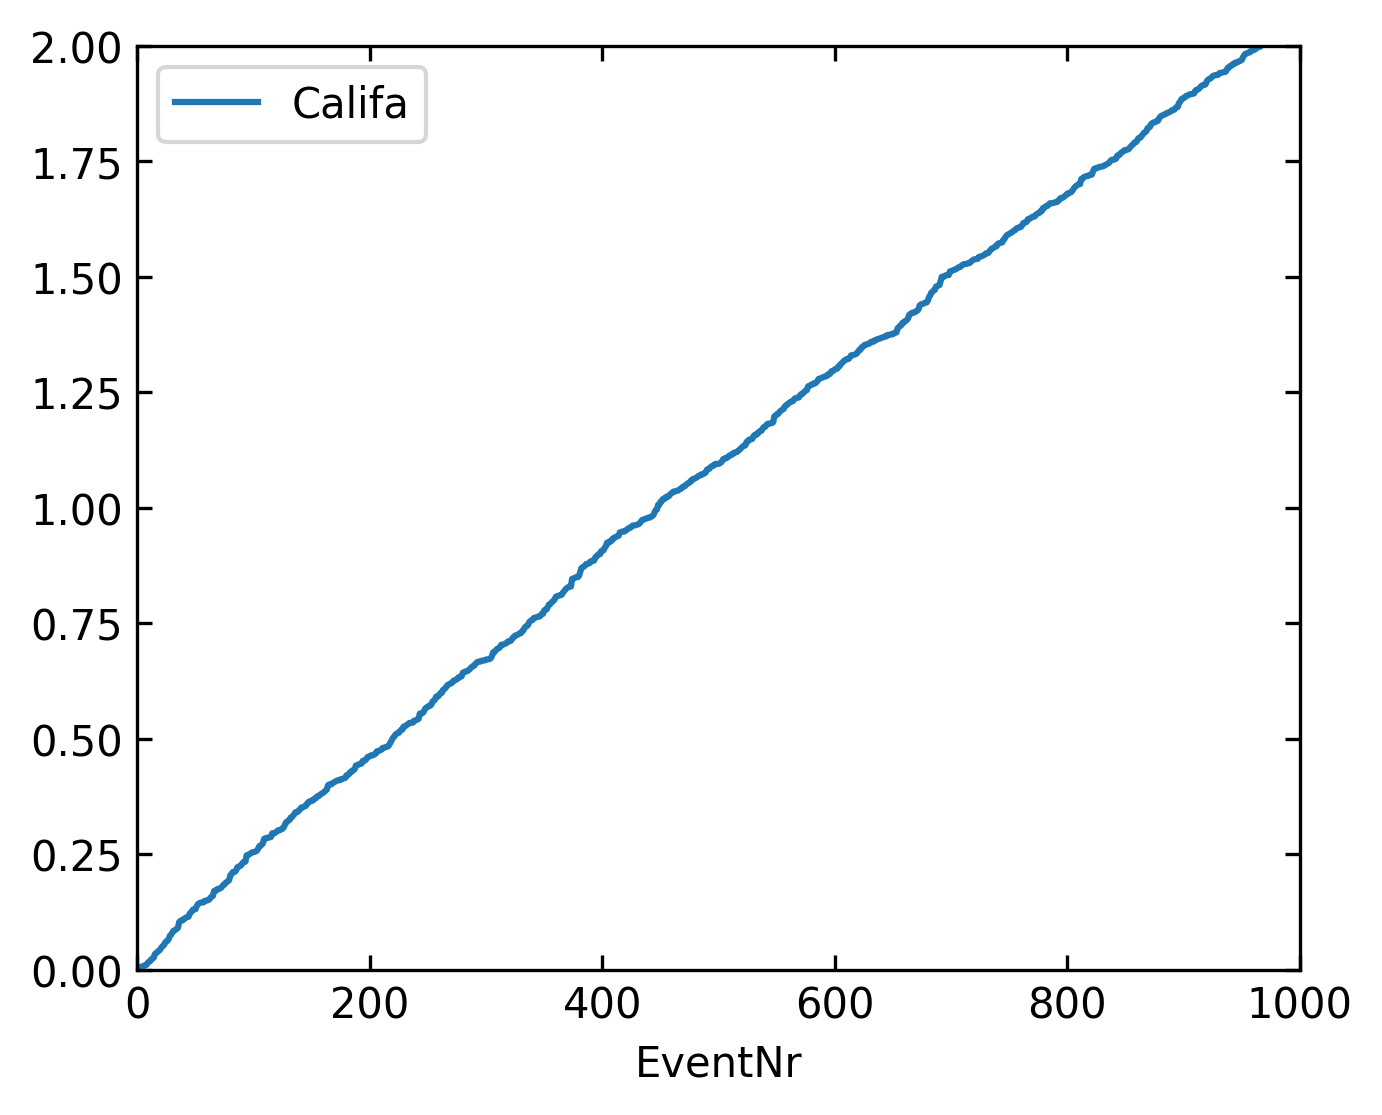

In [ ]:
plt.figure(figsize=(5,4),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)
plt.ylim([0,2])
plt.xlim([0,1000])

df_califa.plot(y="time",x="EventNr",ax=ax,label="Califa")
df_its.plot(y="time_corrected",x="trigger_corrected",ax=ax,label="ALPIDE")
df_califa_small[np.invert(isFound)].plot(y="time",x="EventNr",ax=ax,marker="x",linewidth=0,c="red",label="Missed")
    
ax.set_ylabel("Time [s]",horizontalalignment="right",y=1.0)
ax.set_xlabel("Event number",horizontalalignment="right",x=1.0)

plt.grid(visible=True,which="both",axis='both', color='0.97')

#plt.tight_layout()

# Make the zoom-in plot:
x1 = 80
x2 = 86
y1 = 0.206
y2 = 0.218

axins = ax.inset_axes([0.5, 0.05, 0.47, 0.4])
df_califa.plot(y="time",x="EventNr",ax=axins,marker="s",markersize=3)
df_its.plot(y="time_corrected",x="trigger_corrected",ax=axins,marker="s",markersize=3)
df_califa_small[np.invert(isFound)].plot(y="time",x="EventNr",ax=axins,marker="x",linewidth=0,c="red")

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xlabel('')
axins.set_ylabel('')
axins.tick_params(axis='both',which='both', direction='in',right=True,top=True)
axins.get_legend().remove()


ax.indicate_inset_zoom(axins, edgecolor="black")

plt.draw()

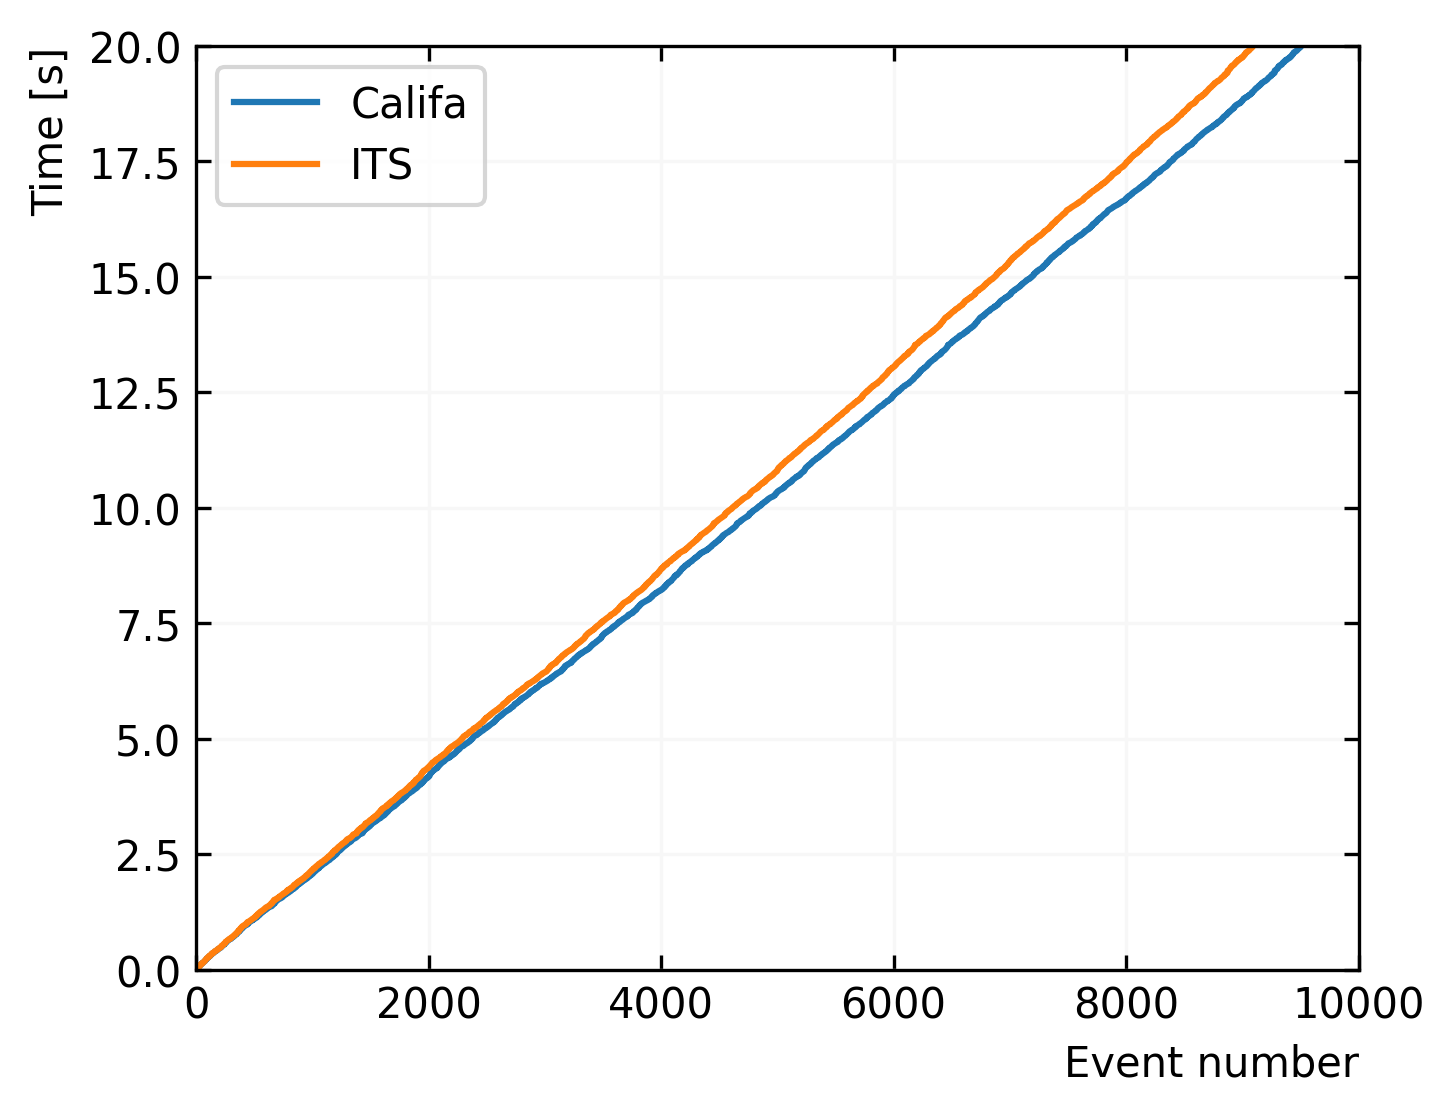

In [ ]:
plt.figure(figsize=(5,4),dpi=300)

ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

plt.xlim([0000,10000])
plt.ylim([0,20])
df_califa.plot(y="time",x="EventNr",ax=ax,label="Califa")
df_its.plot(y="time_corrected",x="trigger_corrected",ax=ax,label="ITS")
    
ax.set_ylabel("Time [s]",horizontalalignment="right",y=1.0)
ax.set_xlabel("Event number",horizontalalignment="right",x=1.0)

plt.grid(visible=True,which="both",axis='both', color='0.97')
#plt.savefig(runname+"_timestamps_vs_time.png")

In [ ]:
len(diffs_its)

28741

In [ ]:
diffs_its = df_its_small.time.diff().to_numpy()
diffs_califa = df_califa_small.time.diff().to_numpy()

plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

plt.hist(diffs_califa,bins=np.logspace(np.log10(4E-6),np.log10(50E-3), 1000),histtype='step',label="Califa",alpha=1)
plt.hist(diffs_its,bins=np.logspace(np.log10(4E-6),np.log10(50E-3), 1000),label="ALPIDE",alpha=0.5)
plt.hist(diffs_missed,bins=np.logspace(np.log10(4E-6),np.log10(50E-3), 1000),label="Missed",color="Red",alpha=0.5)

ax.set_xlabel("Time step [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Count",horizontalalignment="right",y=1.0)
ax.set_xlim([1E-6,1E-1])
ax.set_ylim([1E-1,3E2])
#plt.xticks(np.arange(0, 440, 40))
ax.set_yscale("log")
ax.set_xscale('log')

ax.legend(frameon=False)

NameError: name 'df_its_small' is not defined

In [ ]:
mo

NameError: name 'mo' is not defined

NameError: name 'mo' is not defined

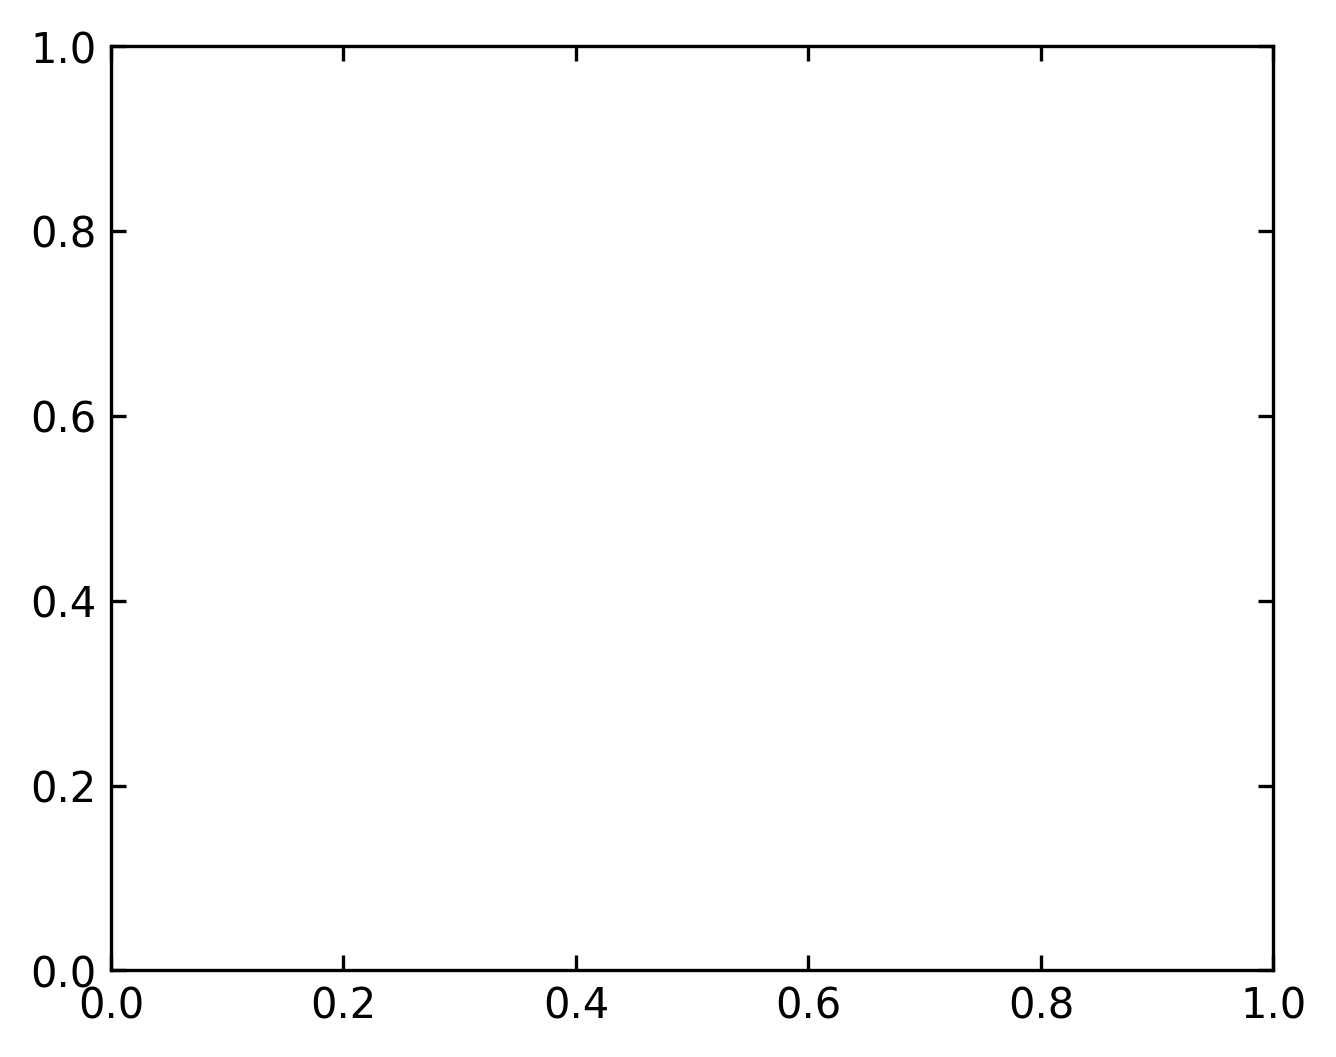

In [98]:
diffs_its = df_its.time.diff().to_numpy()
diffs_califa = df_califa[0:len(diffs_its)].time.diff().to_numpy()

plt.figure(figsize=(5,4),dpi=300)
ax=plt.gca()
ax.tick_params(axis="both",direction="in",right=True,top=True)

plt.hist(mo,bins=np.logspace(np.log10(4E-6),np.log10(50E-3), 100),label="Califa",alpha=0.4)
#plt.hist(diffs_its,bins=np.logspace(np.log10(4E-6),np.log10(50E-3), 100),label="ITS",alpha=0.4)

ax.set_xlabel("Time step [s]",horizontalalignment="right",x=1.0)
ax.set_ylabel("Entries",horizontalalignment="right",y=1.0)
#ax.set_xlim([0,4000])
#plt.xticks(np.arange(0, 440, 40))
ax.set_yscale("log")
ax.set_xscale('log')

ax.legend()

In [99]:
rate = (150000-1000)/(df_califa["time"][150000]-df_califa["time"][1000])
rate

482.15045954730533

NameError: name 'df_its' is not defined